In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터를 불러온다.
# CSV 파일로부터 데이터 불러오기
data = pd.read_csv('[24-2 DS_Project1] Data_Submission/[24-2 DS_Project1] Data.csv')

# 데이터프레임의 기본 정보 확인
print("데이터 정보:\n", data.info())  # 각 열의 타입, 결측치 등을 확인

# 데이터의 첫 몇 줄 확인
print("데이터 첫 5줄:\n", data.head())

# 데이터의 컬럼명 확인
print("컬럼명:\n", data.columns)

# 결측치 확인
print("결측치:\n", data.isnull().sum())

# 기술 통계 확인
print("기술 통계:\n", data.describe())

# # 'Is Fraud?' 컬럼을 0과 1로 변환 (Yes -> 1, No -> 0)
# data['Is Fraud?'] = data['Is Fraud?'].apply(lambda x: 1 if x == 'Yes' else 0)
# print("Is Fraud?", data['Is Fraud?'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644768 entries, 0 to 1644767
Data columns (total 28 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   User                           1644768 non-null  int64  
 1   Gender                         1644768 non-null  int64  
 2   Current Age                    1644768 non-null  int64  
 3   Retirement Age                 1644768 non-null  int64  
 4   Birth Year                     1644768 non-null  int64  
 5   Birth Month                    1644768 non-null  int64  
 6   Zipcode                        1644768 non-null  float64
 7   Per Capita Income - Zipcode    1644768 non-null  int64  
 8   Yearly Income                  1644768 non-null  float64
 9   Total Debt                     1644768 non-null  float64
 10  Credit Score                   1644768 non-null  int64  
 11  Year                           1644768 non-null  int64  
 12  Month         

In [36]:
import pandas as pd

# 사기 거래 데이터만 선택
fraud_data = data[data['Is Fraud?'] == 1]

# 사기 거래 데이터를 엑셀 파일로 저장
fraud_data.to_excel('fraud_transactions.xlsx', sheet_name='Fraud Transactions', index=False)

print("사기 거래 데이터를 엑셀 파일로 저장했습니다.")


사기 거래 데이터를 엑셀 파일로 저장했습니다.


In [38]:
import pandas as pd

# 각 컬럼의 고유값 개수와 고유값 목록 확인
for column in data.columns:
    unique_values = data[column].unique()  # 고유값 리스트
    unique_count = data[column].nunique()  # 고유값 개수
    print(f"'{column}' 컬럼의 고유값 개수: {unique_count}")
    print(f"'{column}' 컬럼의 고유값 목록: {unique_values}\n")


'User' 컬럼의 고유값 개수: 1509
'User' 컬럼의 고유값 목록: [   0    1    2 ... 1997 1998 1999]

'Gender' 컬럼의 고유값 개수: 2
'Gender' 컬럼의 고유값 목록: [0 1]

'Current Age' 컬럼의 고유값 개수: 78
'Current Age' 컬럼의 고유값 목록: [ 53  81  63  43  42  36  34  48  41  54  76  66  70  40  37  49  21  47
  51  46  59  91  79  57  60  61  55  45  44  29  28  82  90  30  65  87
  58  25  32  64  52  23  33  75  62  56  35  26  24  39  86  67  83  68
  92  84  27  20  38  80  31  50  77  88 101  74  73  85  78  72  69  71
  89  98  22  93  94  99]

'Retirement Age' 컬럼의 고유값 개수: 28
'Retirement Age' 컬럼의 고유값 목록: [66 68 67 63 70 60 62 71 64 58 72 65 55 75 73 57 59 69 56 61 54 78 74 79
 53 76 50 77]

'Birth Year' 컬럼의 고유값 개수: 77
'Birth Year' 컬럼의 고유값 목록: [1966 1938 1957 1976 1977 1983 1986 1985 1971 1978 1943 1953 1949 1979
 1982 1970 1998 1972 1968 1973 1961 1929 1941 1962 1959 1958 1964 1960
 1975 1991 1937 1956 1989 1955 1932 1994 1965 1987 1967 1996 1944 1963
 1984 1993 1974 1992 1980 1933 1952 1936 1951 1927 1945 1935 1999 1981
 1939 195

In [43]:
import pandas as pd

# 'User' 컬럼으로 그룹화하고 각 그룹의 첫 번째 행 선택
grouped_data = data.groupby('User').first().reset_index()

# 그룹화된 데이터 확인
print(grouped_data.head())  # 첫 몇 개의 데이터를 출력하여 확인


   User  Gender  Current Age  Retirement Age  Birth Year  Birth Month  \
0     0       0           53              66        1966           11   
1     1       0           53              68        1966           12   
2     2       0           81              67        1938           11   
3     3       0           63              63        1957            1   
4     4       1           43              70        1976            9   

   Zipcode  Per Capita Income - Zipcode  Yearly Income    Total Debt  ...  \
0   8250.0                     17420410     52077100.0  9.088794e+07  ...   
1  88637.0                     22545145     51312000.0  1.503321e+08  ...   
2   8208.0                     13495195     27915400.0  1.177827e+05  ...   
3  89931.0                     97071275    147437300.0  8.482269e+07  ...   
4   5883.0                     32009215     78510200.0  1.202609e+08  ...   

    Card Number  Expires  Has Chip  Credit Limit  Acct Open Date  \
0  5.655323e+15  12/2022      

1. 상관관계 분석
- 상관계수를 통해 변수들이 사기 여부에 얼마나 영향을 미치는지 탐색한다. 상관관계가 높을수록 사기 여부에 더 큰 영향을 줄 가능성이 있다.
- 주로 Pearson Correlation을 사용해 상관관계를 확인할 수 있다. 이는 연속형 변수 간의 선형적 관계를 나타낸다.
- 이 단계에서 주의할 점은 상관관계가 인과관계를 의미하지는 않으므로 이를 확정적으로 해석하는 것에 조심해야 한다.


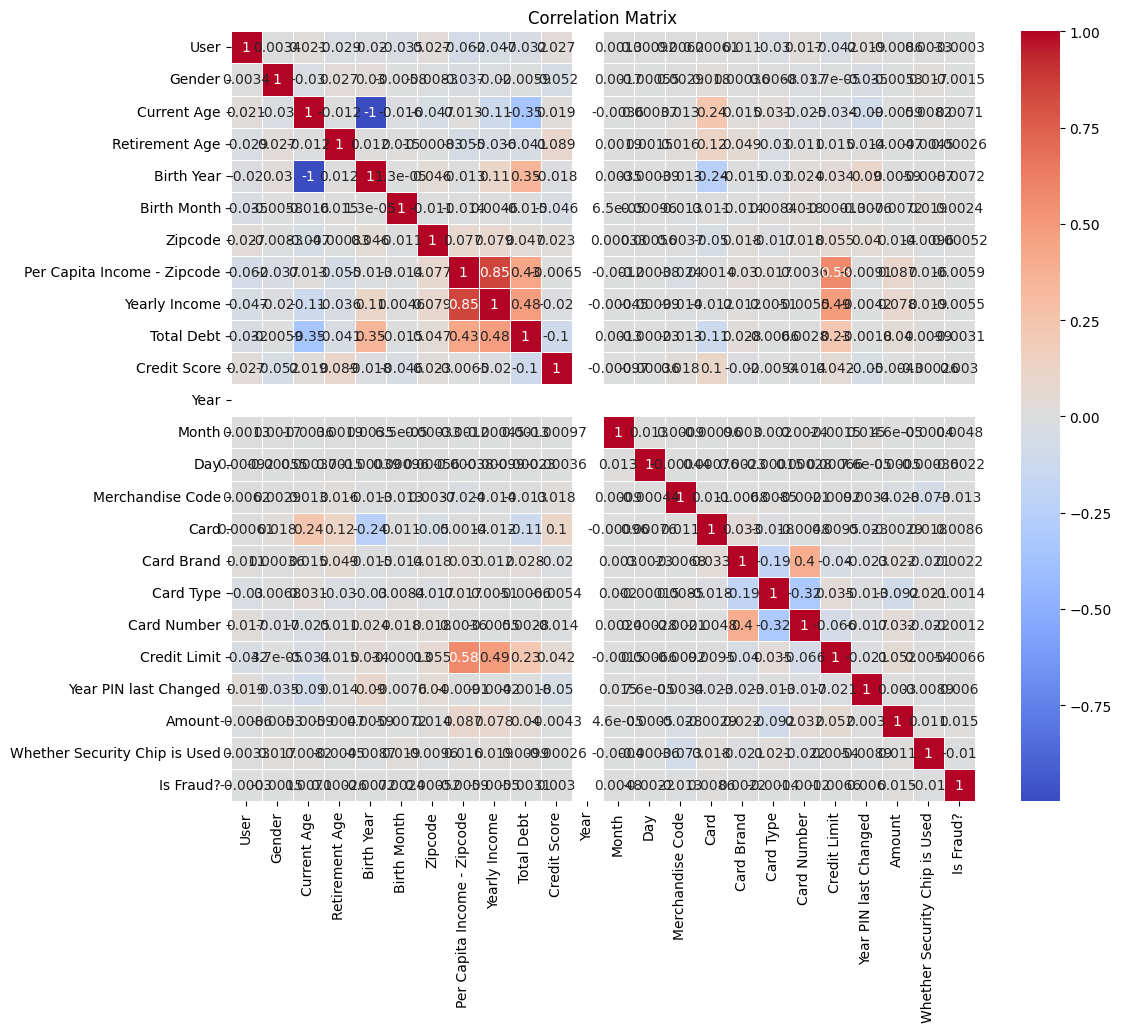

사기 여부와 상관관계가 높은 변수들:
 Is Fraud?                        1.000000
Amount                           0.015480
Card                             0.008580
Current Age                      0.007118
Year PIN last Changed            0.005981
Month                            0.004825
Credit Score                     0.003002
Birth Month                      0.002408
Card Brand                       0.002222
Zipcode                          0.000522
Retirement Age                   0.000257
User                            -0.000300
Card Number                     -0.001207
Card Type                       -0.001389
Gender                          -0.001504
Day                             -0.002230
Total Debt                      -0.003129
Yearly Income                   -0.005501
Per Capita Income - Zipcode     -0.005938
Credit Limit                    -0.006642
Birth Year                      -0.007207
Whether Security Chip is Used   -0.010423
Merchandise Code                -0.013192
Year        

In [10]:
# 수치형 데이터만 선택
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# 상관관계 분석을 위한 상관행렬 계산 (수치형 데이터만 포함)
corr_matrix = numeric_data.corr()

# 상관행렬 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 'Is Fraud?'와 가장 상관관계가 높은 변수들 확인
fraud_corr = corr_matrix['Is Fraud?'].sort_values(ascending=False)
print("사기 여부와 상관관계가 높은 변수들:\n", fraud_corr)


2. 랜덤 포레스트 모델로 변수 중요도 분석
상관관계 분석 결과에서 'Is Fraud?'(사기 여부)와 관련된 변수들의 상관관계가 매우 낮은 것을 확인할 수 있다. 대부분의 변수들이 'Is Fraud?'와 상관계수가 0.01 미만으로 나타났고, 이는 해당 변수들이 사기 여부와 직접적인 상관성이 낮다는 것을 의미한다. 다만, 이는 단순한 상관분석이기 때문에 더 복잡한 관계나 패턴을 찾기 위해 특성 중요도 분석 또는 모델 기반 분석이 필요하다.


3. 로지스틱 회귀 (Logistic Regression)
- 이진 분류 문제에서는 로지스틱 회귀를 사용해 각 특성이 사기 여부에 어떻게 기여하는지를 분석할 수 있다.
- 로지스틱 회귀의 결과로 나온 회귀 계수(coefficient)는 각 특성이 사기 여부에 미치는 영향을 정량적으로 나타내므로 해석이 쉽다. 양의 값은 해당 변수가 사기 거래로 이어질 가능성을 높이는 방향으로 작용하고, 음의 값은 반대이다.

4. P-값과 유의성 검정 (P-value and Statistical Significance)
- 각 변수의 유의성(P-value)을 확인하여 해당 변수가 사기 여부에 통계적으로 유의미한 영향을 미치는지 검정한다.
- 일반적으로 P-값이 0.05 미만이면 해당 변수는 사기 여부에 유의미한 영향을 미친다고 판단할 수 있다.

5. 교차 검증 (Cross-validation)
- 모델이 훈련 데이터에 과적합(overfitting)되지 않도록 교차 검증을 통해 평가해야 한다. 이는 모델이 일반화할 수 있는 능력을 평가하기 위함이다.

6. SHAP 값 분석 (SHapley Additive exPlanations)
- SHAP 값은 머신러닝 모델에서 각 특성이 예측에 어떻게 기여했는지를 정량적으로 보여주는 방법이다. 이를 통해 각 변수가 사기 여부를 예측하는 데 기여하는 정도를 직관적으로 파악할 수 있다.